In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
print ("Python version" + sys.version)
print("pd version = "+ pd. __version__)
print("numpy version = "+ np. __version__)


Python version3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]
pd version = 1.5.3
numpy version = 1.23.5


In [71]:
print("seaborn version = "+ sns. __version__)
print("warnings version = "+ warnings. __version__)

seaborn version = 0.12.2


AttributeError: module 'warnings' has no attribute '__version__'

In [16]:
#reading the data
loandata = pd.read_csv("loan.csv")

# observe data with top 5 values
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [17]:
#total size of data
loandata.shape

(39717, 111)

In [18]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [19]:
loandata.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

In [20]:
#check if loan data has duplicate values
print(loandata.duplicated(subset=None, keep='first').count())
dup=loandata[loandata.duplicated(['id'])]
dup   #there are no duplicates

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [21]:
#check what all data has null values
loandata.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [22]:
#check if data has null values
loandata.isnull().all(axis=1).sum() #number of rows with null values is 0

0

In [23]:
loandata.isnull().all(axis=0).sum() #number of columns with null value is 54

54

### There are many NA and null values. So we need to clean them

In [24]:
#drop columns with null values
loandata.dropna(axis = 1, how = 'all', inplace = True)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [25]:
loandata.shape

(39717, 57)

### There are columns which have one single value for all the rows. So we can get rid of those columns.

In [26]:
#there are certain columns which has only one value through out all the rows. So we can remove those columns
loandata.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code',
               'acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 
               'delinq_amnt'], axis = 1, inplace = True)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [27]:
loandata.shape

(39717, 48)

### Certain columns dont add any value for defaulter analysis and hence those can be removed.

In [28]:
#There are certain columns which does not add any value to know if the applicant 
#can be a defaulter like desc, member_id, url, title, emp_title etc. So that can be removed
loandata.drop(["member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d",
               "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", 
               "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", 
               "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", 
               "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", 
               "mths_since_last_record"], axis = 1, inplace = True)


In [29]:
loandata.shape

(39717, 22)

In [30]:
#saving the dataframe to file to see how the data now looks
loandata.to_csv('cdata.csv')

In [31]:
#to findout if the current user would default or not, we dont need the data of users whose loan is currently
#running. So we can remove the rows with loan status as current

loandata = loandata[loandata.loan_status != "Current"]

#check if the rows are removed or not
loandata.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [32]:
loandata.shape

(38577, 22)

In [33]:
#Data cleaning
# have the term and emp_length only numbers
loandata.emp_length.fillna('0',inplace=True)
loandata['emp_length']=loandata.emp_length.str.extract('(\d+)')
loandata.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4


In [34]:
loandata.term.fillna('0',inplace=True)
loandata['term']=loandata.term.str.extract('(\d+)')
loandata.head(2)

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,1077501,5000,4975.0,36,10.65%,162.87,B,B2,10,RENT,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,1077430,2500,2500.0,60,15.27%,59.83,C,C4,1,RENT,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4


In [35]:
#data cleaning
#lets remove % sign from int_rate and revol_utlil column
loandata['int_rate'] = loandata['int_rate'].str.rstrip('%')

# Lets remove % symbol from revol_util column so that it can be used in calculations
loandata['revol_util'] = loandata['revol_util'].str.rstrip('%')

In [36]:
loandata.dtypes


id                       int64
loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

In [37]:
#lets covert some numeric data to numeric type
cols1 = ['loan_amnt','int_rate','emp_length']
loandata[cols1] = loandata[cols1].apply(pd.to_numeric)

In [38]:
loandata.dtypes

id                       int64
loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

In [39]:
#saving the dataframe to file to see how the data now looks
loandata.to_csv('cdata-final.csv')

In [40]:
#Loan status by total loan issued
(loandata.loan_status.value_counts()*100)/len(loandata)
#arround 85% is fully paid
#15% is charged off

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [41]:
#purpose of loan by total loan issued
(loandata.purpose.value_counts()*100)/len(loandata)

# Observations
# Most of the loans taken for debt consolidation(47%) and Credit card bill payment
# Other is also one of the main area where loans were taken.

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

In [42]:
#Derived column for analysis
#derive month and year from issue date
loandata.issue_d = pd.to_datetime(loandata.issue_d, format='%b-%y')
loandata['year']=loandata['issue_d'].dt.year
loandata['month']=loandata['issue_d'].dt.month
loandata.to_csv('cdata-final.csv')
loandata.head()


,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
0,1077501,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,credit_card,27.65,Jan-85,1,3,0,83.70,9,2011,12
1,1077430,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,car,1.00,Apr-99,5,3,0,9.40,4,2011,12
2,1077175,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,small_business,8.72,Nov-01,2,2,0,98.50,10,2011,12
3,1076863,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,other,20.00,Feb-96,1,10,0,21,37,2011,12
5,1075269,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,wedding,11.20,Nov-04,3,9,0,28.30,12,2011,12


### Univariate Analysis- quantitative variables

In [43]:
#Univariate Analysis- quantitative variables
loandata['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f91294dc5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f91294dcd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f91294dc250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f91294dd210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f91294dd5a0>],
 'means': []}

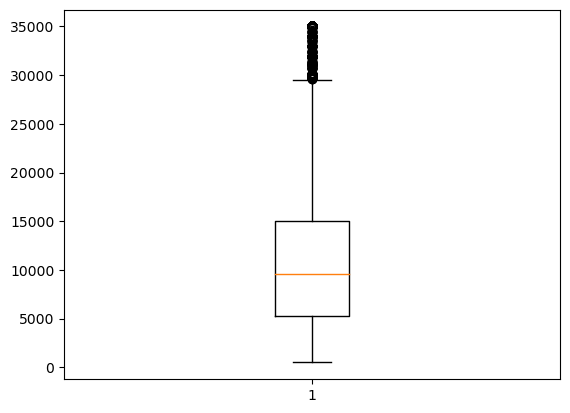

In [44]:
plt.boxplot(loandata.loan_amnt)

In [45]:
loandata.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### Outlier treatment

{'whiskers': [<matplotlib.lines.Line2D at 0x7f917b3952a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f917b3957e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f917b395000>],
 'medians': [<matplotlib.lines.Line2D at 0x7f917b395d20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f917b395fc0>],
 'means': []}

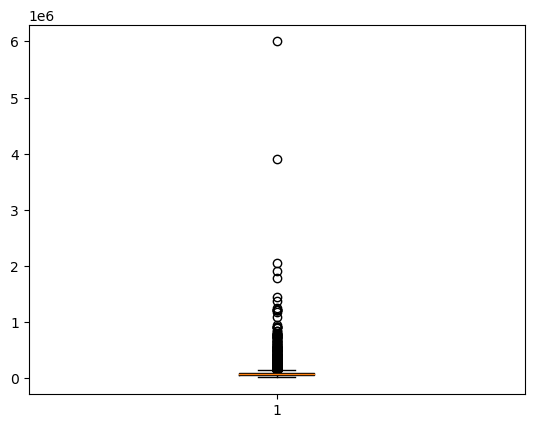

In [46]:
plt.boxplot(loandata.annual_inc)

In [47]:
#There are outliers , so remove Outliers quantile .99 from Annual Income
loandata = loandata[loandata["annual_inc"] < loandata["annual_inc"].quantile(0.99)]

print('After Removal of Outliers :')
print(loandata["annual_inc"].describe())

After Removal of Outliers :
count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7f917b3bcd00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f917b3bd240>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f917b3bca60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f917b3bd780>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f917b3bda20>],
 'means': []}

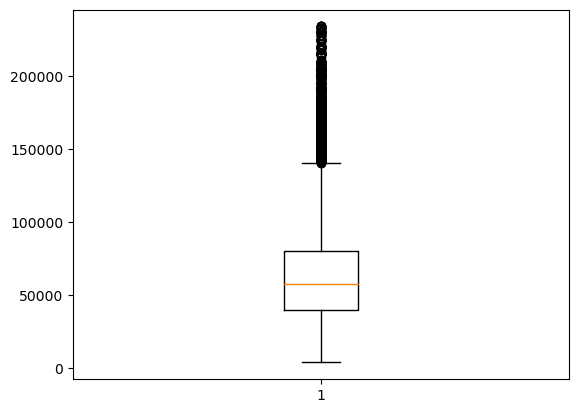

In [48]:
plt.boxplot(loandata.annual_inc)

In [49]:
loandata['int_rate'].describe()
#mean is at 12%

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f913d076bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f913d077010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f913d076950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f913d077550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f913d0777f0>],
 'means': []}

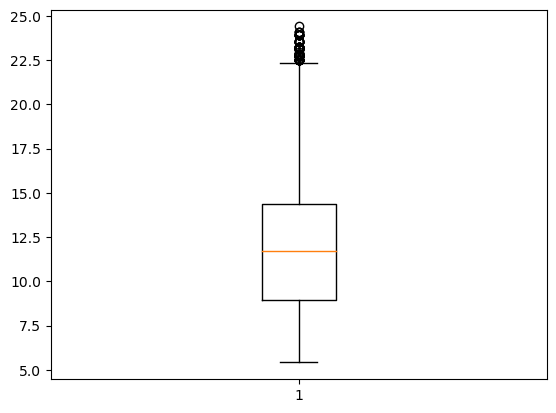

In [50]:
plt.boxplot(loandata.int_rate)

### Corelation Matrix

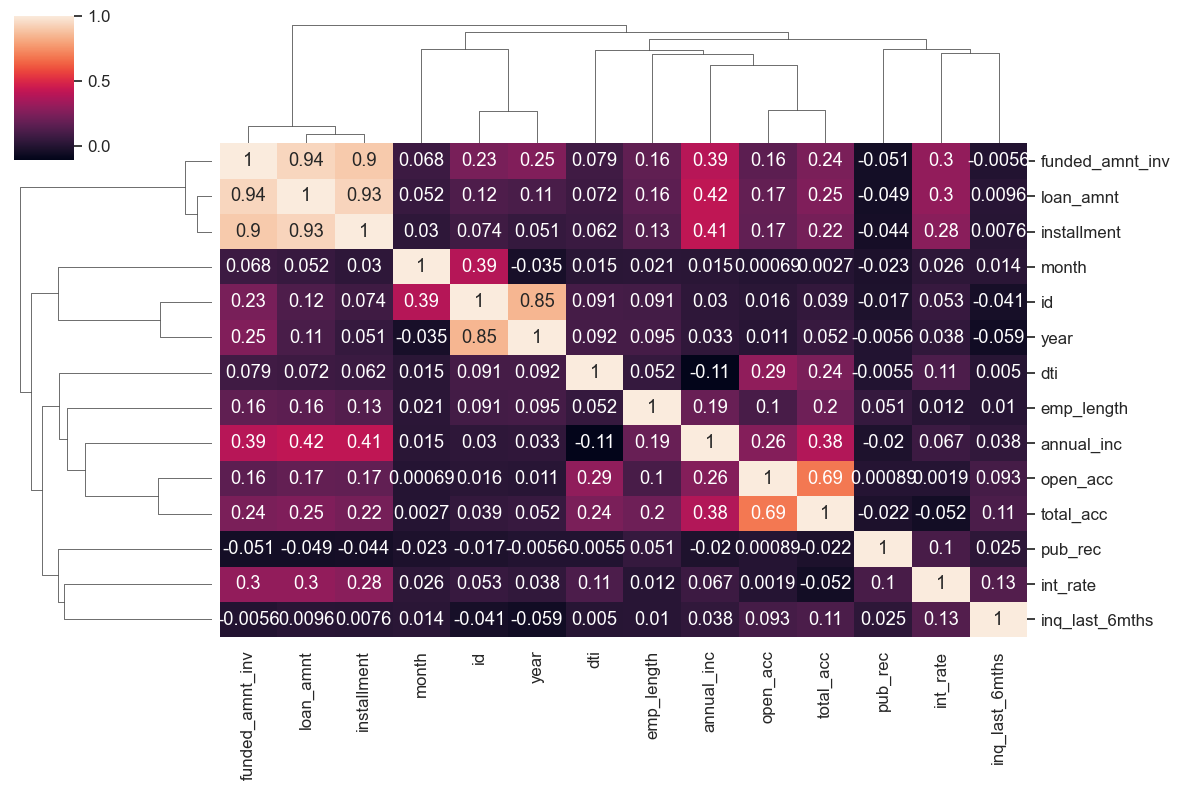

In [51]:
#Correlation Matrix
loan_correlation = loandata.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8))
plt.show()

#Anual income in low then dti is high and vice versa
#Aual income increases by employement length
#Loan amount also increases with increase in annual_inc and also the installment increases with annual inc

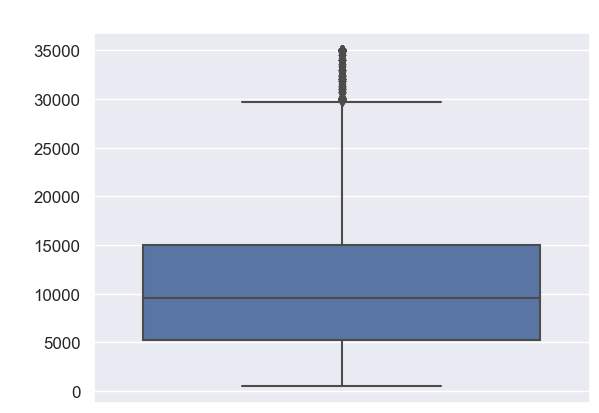

In [54]:
## Univariate Analysis on Loan amount-Quantitative Variables


ax = sns.boxplot(y=loandata['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

Text(0.5, 0, 'Loan Amount')

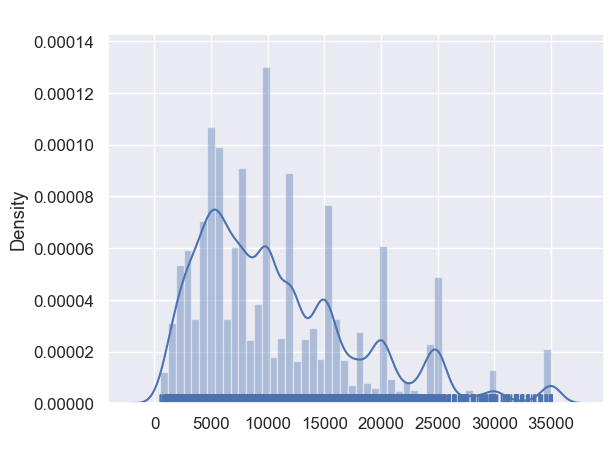

In [56]:

ax = sns.distplot(loandata['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')

#observation: most of the Loan amounts are in range of 5000 - 10000

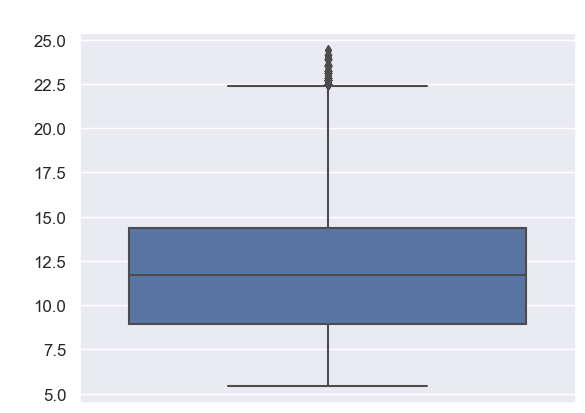

In [58]:
# Univariate Analysis on Intrest Rate-Quantitative Variables
ax = sns.boxplot(y=loandata['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()


Text(0.5, 0, 'Interest Rate')

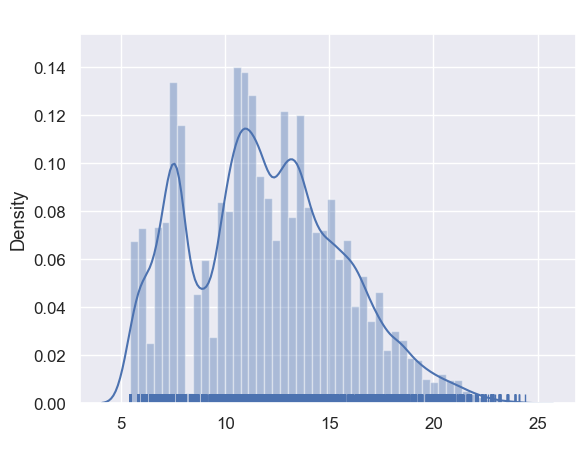

In [59]:
ax = sns.distplot(loandata['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
#Observation: Most of the  Interest Rates on loans are in range of 12% - 15%

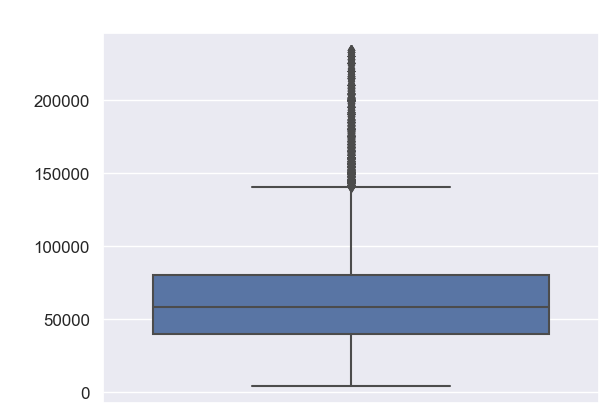

In [61]:
# Univariate Analysis on Annual Income 
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loandata['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

Text(0.5, 0, 'Annual Income')

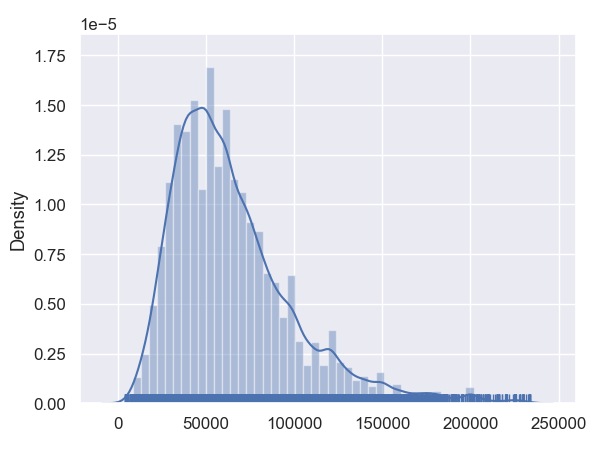

In [62]:
ax = sns.distplot(loandata['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

#most of the borrower's Annual incomes are in range of 60000- 80000

### Visualizing Categorical data

<Axes: xlabel='loan_status', ylabel='count'>

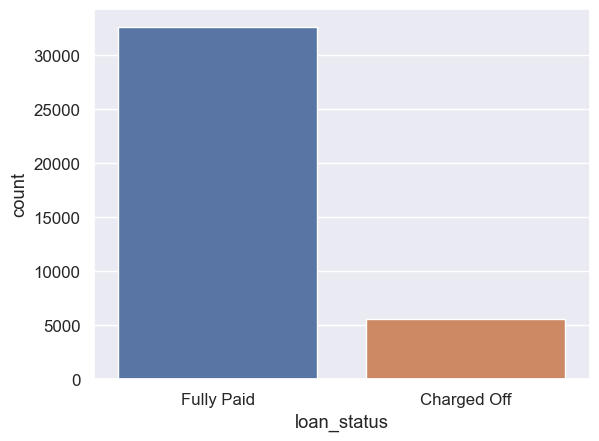

In [52]:
#Visualizing categorical data
 
#So subsetting the data while plotting only for 'Charged Off' loan_status for below plots
sns.countplot(x = 'loan_status', data = loandata)


### Analyzing home_ownership

In [107]:
#Analyzing home_ownership
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [108]:
#replacing 'NONE' with 'OTHERS'
loandata['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [109]:
#checking unique values for home_ownership again
loandata['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<Axes: xlabel='home_ownership', ylabel='count'>

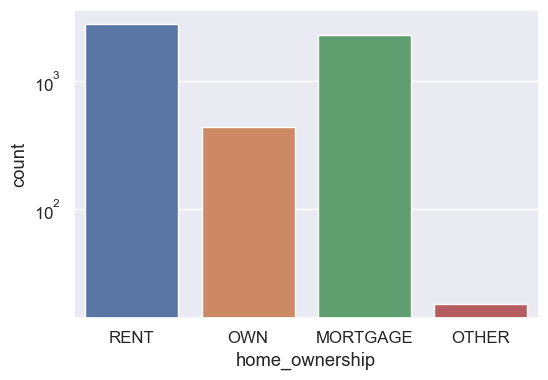

In [110]:
fig, homeownership_plot = plt.subplots(figsize = (6,4))
homeownership_plot.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loandata[loandata['loan_status']=='Charged Off'])

##Observation: It is observed that Mortgage and Rent home owenrs contribute towards the defaulter

<Axes: xlabel='count', ylabel='purpose'>

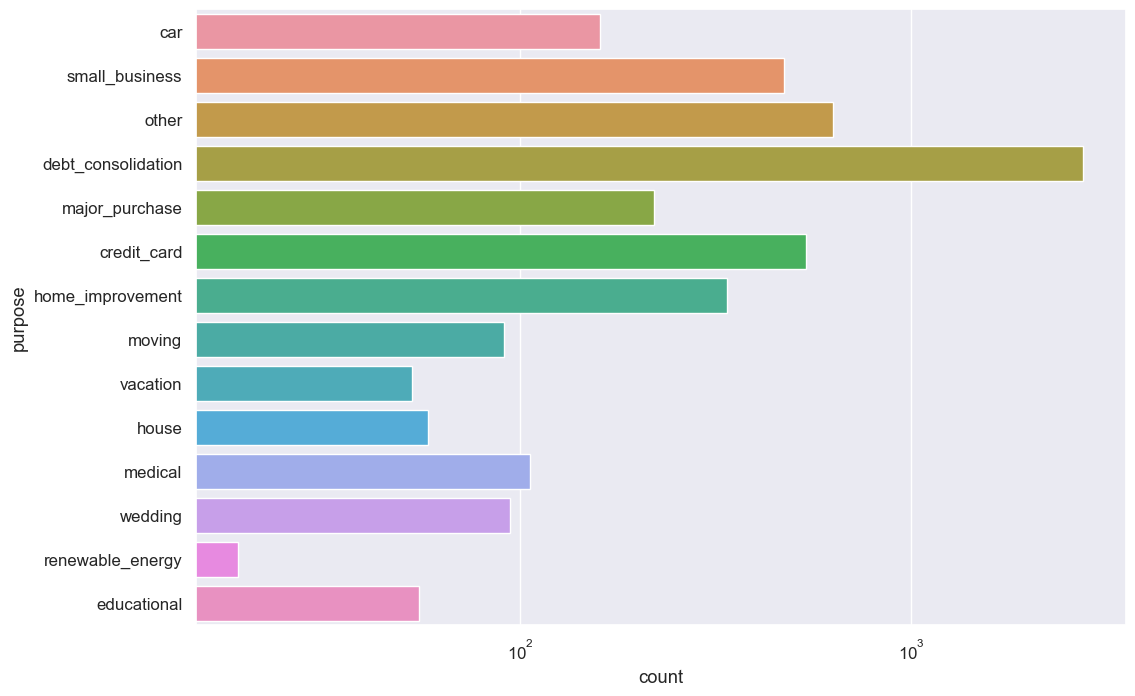

In [165]:
fig, purpose_plot = plt.subplots(figsize = (12,8))
purpose_plot.set(xscale = 'log')
sns.countplot(y ='purpose', data=loandata[loandata.loan_status == 'Charged Off'])

# Observations :
# Below plot shows that most of the loans were taken for the purpose of debt consolidation & paying credit card bill.
# Number of chraged off count also high too for these loans.

<Axes: xlabel='count', ylabel='home_ownership'>

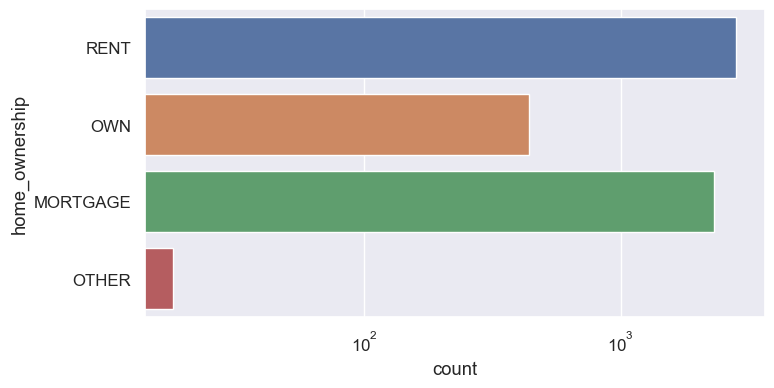

In [121]:
fig, home_owner_plot = plt.subplots(figsize = (8,4))
home_owner_plot.set(xscale = 'log')
sns.countplot(y ='home_ownership', data=loandata[loandata.loan_status == 'Charged Off'])

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

<Axes: xlabel='count', ylabel='term'>

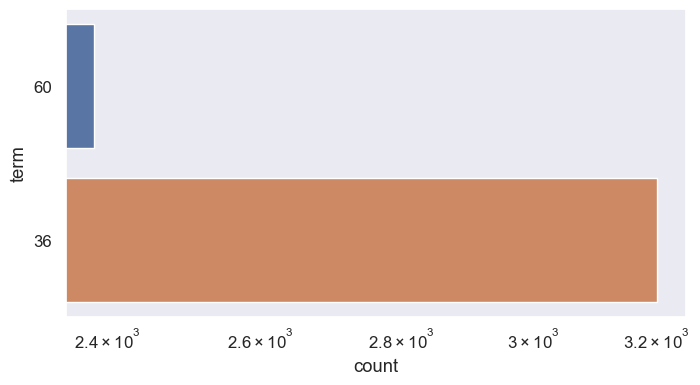

In [120]:
fig, term_plot = plt.subplots(figsize = (8,4))
term_plot.set(xscale = 'log')
sns.countplot(y ='term', data=loandata[loandata.loan_status == 'Charged Off'])

# Observations :
# Below plot shows that those who had taken loan to repay in 36 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 60 months.


## Bivariate Analysis

### Derive Columns for analysis

In [132]:
#Create bins to make the numerics to categorical
loandata['int_rate_groups'] = pd.cut(loandata['int_rate'], bins=5,precision =0,
                                     labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loandata['open_acc_groups'] = pd.cut(loandata['open_acc'],bins = 5,precision =0,
                                     labels=['2-10','10-19','19-27','27-36','36-44'])
loandata['total_acc_groups'] = pd.cut(loandata['total_acc'], bins=5,precision =0,
                                      labels=['2-20','20-37','37-55','55-74','74-90'])
loandata['annual_inc_groups'] = pd.cut(loandata['annual_inc'], bins=5,precision =0,
                                       labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

loandata.to_csv('cdata-after-binning.csv')
loandata.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,total_acc,year,month,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups
0,1077501,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,3,0,83.70,9,2011,12,9%-13%,2-10,2-20,3k-31k
1,1077430,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,3,0,9.40,4,2011,12,13%-17%,2-10,2-20,3k-31k
2,1077175,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2,0,98.50,10,2011,12,13%-17%,2-10,2-20,3k-31k
3,1076863,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,10,0,21,37,2011,12,13%-17%,2-10,20-37,3k-31k
5,1075269,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,9,0,28.30,12,2011,12,5%-9%,2-10,2-20,3k-31k


<Axes: xlabel='count', ylabel='int_rate_groups'>

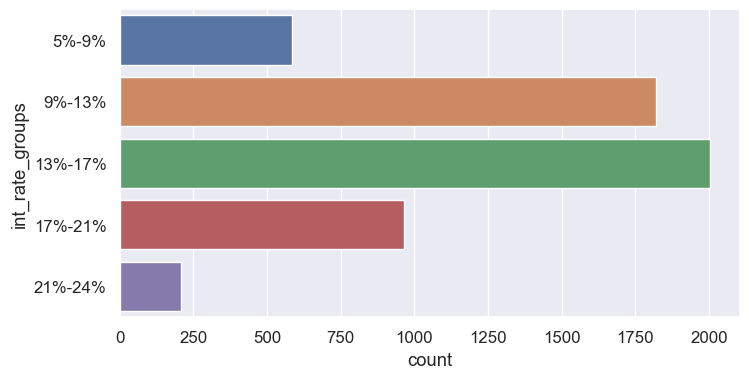

In [119]:
#Interest rate wrt the bins created

fig, int_rate_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='int_rate_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#Observation: we see that the charged off is seen more when the interest rates are between 13-17% and 9-13%

<Axes: xlabel='count', ylabel='emp_length'>

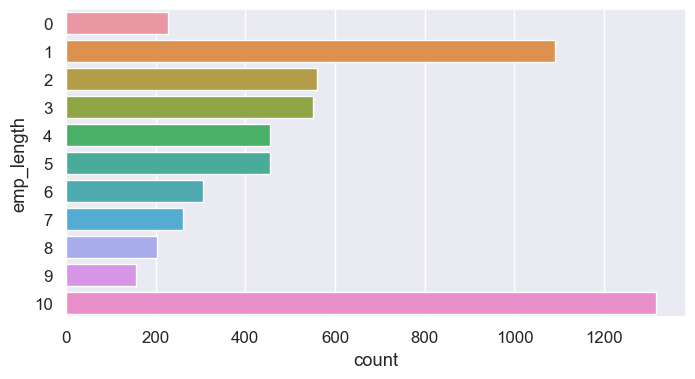

In [122]:
fig, emp_length_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='emp_length', data=loandata[loandata.loan_status == 'Charged Off'])

#Observation: we see that the charged off is more for people with work experience 10 years or with experice of 1 yearb

<Axes: xlabel='count', ylabel='open_acc_groups'>

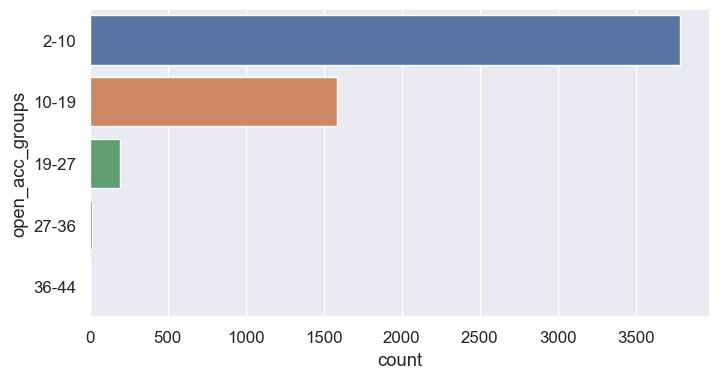

In [123]:
fig, open_acc_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='open_acc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#Observation: we see that the charged off is seen more when the open acc groups 
#(The number of open credit lines in the borrower's credit file) is between 2-10 

<Axes: xlabel='count', ylabel='total_acc_groups'>

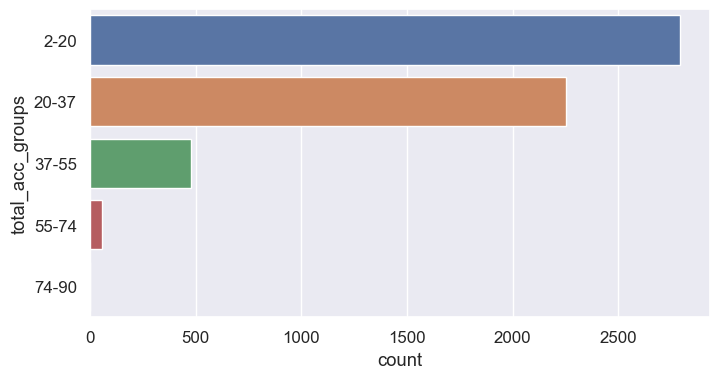

In [124]:
fig, total_acc_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='total_acc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#Observation: we see that the charged off is seen more when the total_acc 
#(The total number of credit lines currently in the borrower's credit file) is between 2-20 and then 20-37 

<Axes: xlabel='count', ylabel='annual_inc_groups'>

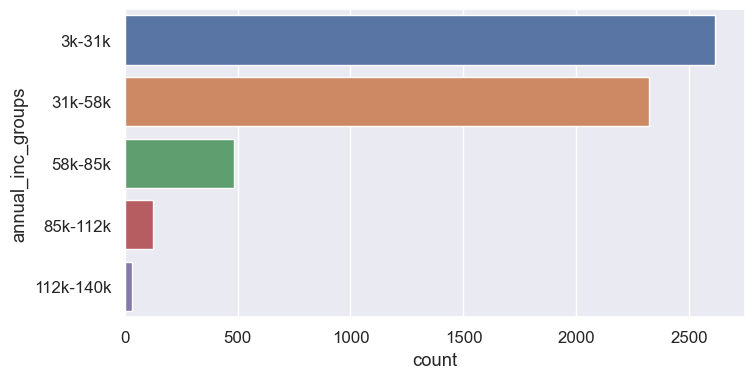

In [125]:
fig, annual_inc_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='annual_inc_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#Observation: we see that the charged off is seen more when the annual inc is between 3k to 58k. 
#More defaulters are seen in the annula income between 3K - 31K

<Axes: xlabel='verification_status', ylabel='count'>

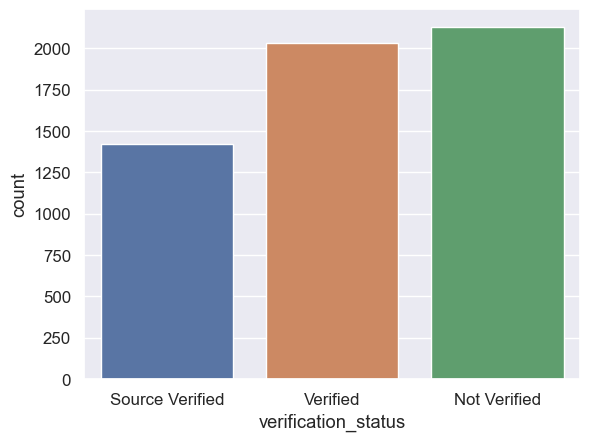

In [134]:
sns.countplot(x='verification_status', data=loandata[loandata['loan_status']=='Charged Off'])
#More defaulters are seen when the application is not verified and also for verified application

<Axes: xlabel='inq_last_6mths', ylabel='count'>

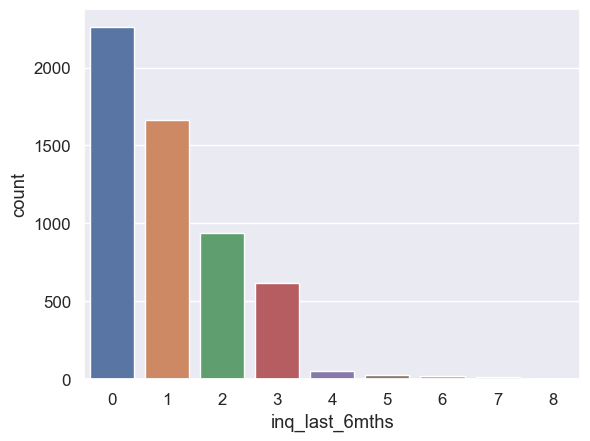

In [135]:
sns.countplot(x='inq_last_6mths', data=loandata[loandata['loan_status']=='Charged Off'])
#More defaulters are seen when the inquiries in last 6 months is between 0-3

<Axes: xlabel='pub_rec', ylabel='count'>

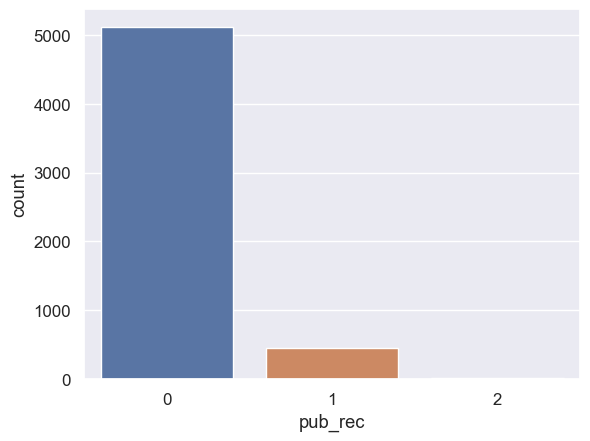

In [136]:
sns.countplot(x='pub_rec', data=loandata[loandata['loan_status']=='Charged Off'])
#More defaulters are seen when the  Number of derogatory public records is 0

<Axes: xlabel='month', ylabel='count'>

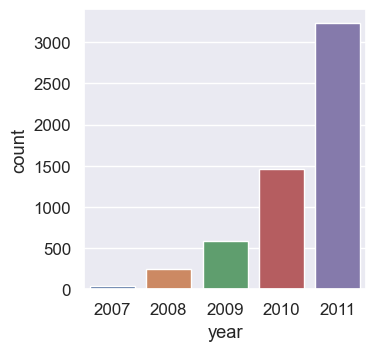

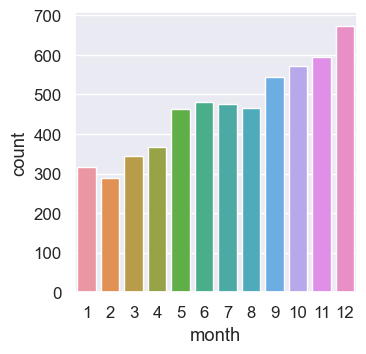

In [141]:
plt.figure(figsize=(8,8))
plt.subplot(221)
sns.countplot(x='year', data=loandata[loandata['loan_status']=='Charged Off'])
plt.figure(figsize=(8,8))
plt.subplot(222)
sns.countplot(x='month', data=loandata[loandata['loan_status']=='Charged Off'])
#charged off is seen more in dec 2011

In [143]:
loandata['installment_groups'] = pd.cut(loandata['installment'], bins=10,precision =0,
                                        labels=['14-145','145-274','274-403','403-531','531-660','660-789',
                                                '789-918','918-1047','1047-1176','1176-1305'])
loandata['funded_amnt_inv_group'] = pd.cut(loandata['funded_amnt_inv'], bins=7,
                                           labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loandata['loan_amnt_groups'] = pd.cut(loandata['loan_amnt'], bins=7,precision =0,
                                      labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loandata['dti_groups'] = pd.cut(loandata['dti'], bins=5,precision =0,
                                labels=['0-6','6-12','12-18','18-24','24-30'])
loandata.to_csv('cdata-after-binning2.csv')
loandata.head()

,id,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,year,month,int_rate_groups,open_acc_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_inv_group,loan_amnt_groups,dti_groups
0,1077501,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,2011,12,9%-13%,2-10,2-20,3k-31k,145-274,0-5k,0-5k,24-30
1,1077430,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,...,2011,12,13%-17%,2-10,2-20,3k-31k,14-145,0-5k,0-5k,0-6
2,1077175,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,2011,12,13%-17%,2-10,2-20,3k-31k,14-145,0-5k,0-5k,6-12
3,1076863,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,2011,12,13%-17%,2-10,20-37,3k-31k,274-403,5k-10k,5k-10k,18-24
5,1075269,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,2011,12,5%-9%,2-10,2-20,3k-31k,145-274,0-5k,0-5k,6-12


<Axes: xlabel='count', ylabel='installment_groups'>

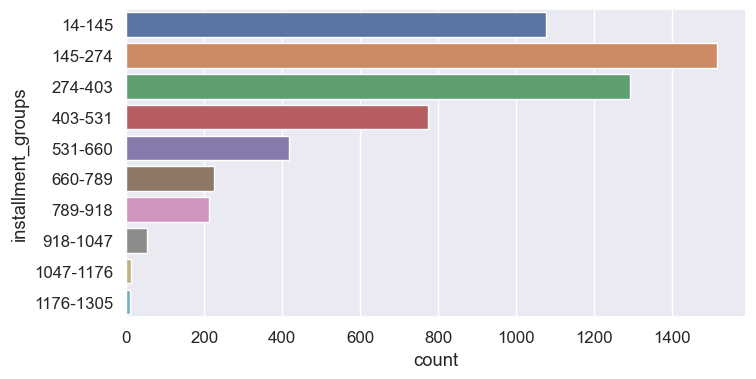

In [144]:
fig, installment_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='installment_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#more defaulters are seen for 145-274 installment group

<Axes: xlabel='count', ylabel='funded_amnt_inv_group'>

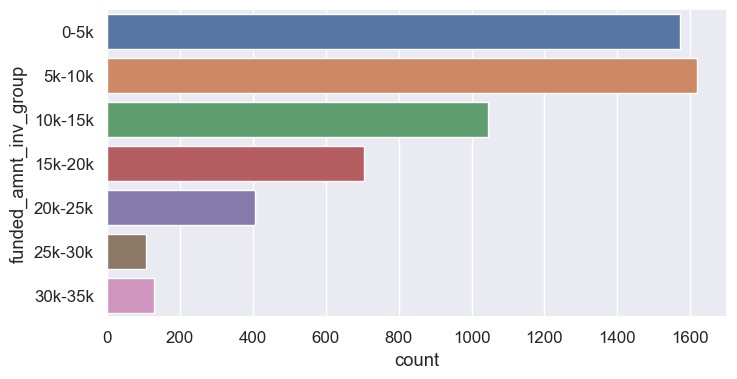

In [145]:
fig, funded_amnt_inv_group_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='funded_amnt_inv_group', data=loandata[loandata.loan_status == 'Charged Off'])

#more defaulters are seen for funded_amt_inv ammount between 5k-10k

<Axes: xlabel='count', ylabel='loan_amnt_groups'>

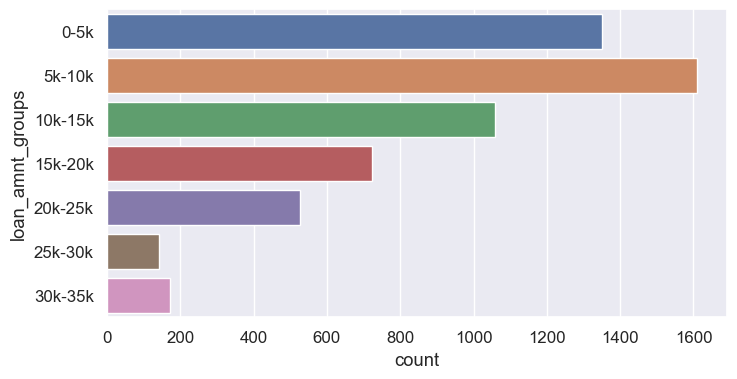

In [146]:
fig, loan_amnt_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='loan_amnt_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#more defaulters are seen for 5k-10k loam amount

<Axes: xlabel='count', ylabel='dti_groups'>

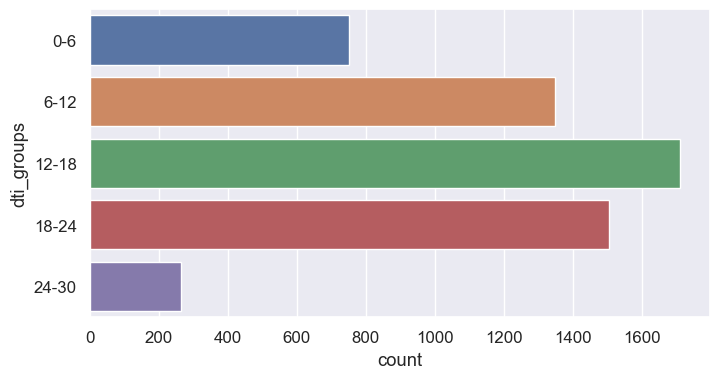

In [147]:
fig, dti_groups_plot = plt.subplots(figsize = (8,4))
sns.countplot(y ='dti_groups', data=loandata[loandata.loan_status == 'Charged Off'])

#more defaulters are seen for 12-18 dti group, however more defaulters 
#are seen from 6-24 dti with 12-18 dti is the highest.

In [160]:
#  grade against Chargedoff_Proportion
grade_vs_loan = loandata.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']  + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Percentage'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']



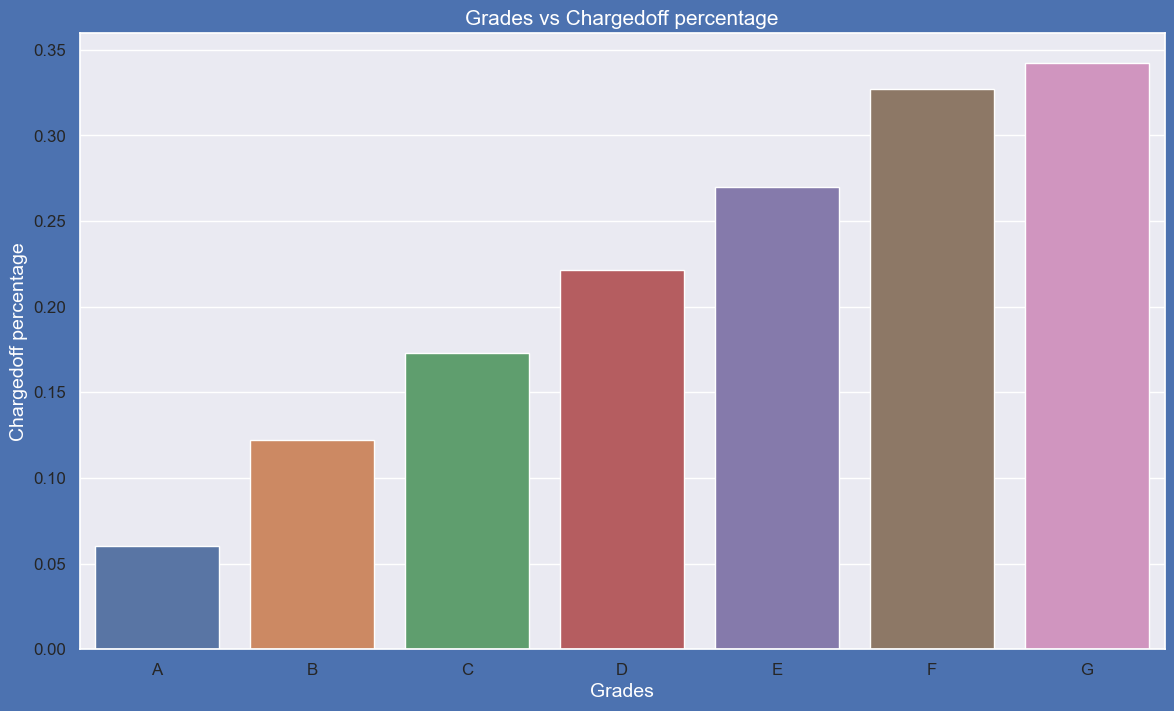

In [161]:
fig, grade_vs_loan_plot = plt.subplots(figsize=(14, 8),facecolor='b')
grade_vs_loan_plot.set_title('Grades vs Chargedoff percentage',fontsize=15,color='w')
grade_vs_loan_plot=sns.barplot(x='grade', y='Chargedoff_Percentage', data=grade_vs_loan)
grade_vs_loan_plot.set_xlabel('Grades',fontsize=14,color='w')
grade_vs_loan_plot.set_ylabel('Chargedoff percentage',fontsize=14,color ='w')
plt.show()

# Observations:
# Grade "F" and "G" have very high chances of charged off.
# Chances of charged of is increasing with grade moving from "A" towards "G"

In [6]:
#Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loandata,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

#charge off is seen more in home_improvement and house and these people had low income in 
#that purpose than the people who fully paid
#Applicants with higher salary mostly applied loans for "home_improvment", "house",
#"renewable_energy","credit_card" and "small_businesses"

NameError: name 'loandata' is not defined

<Figure size 1000x1000 with 0 Axes>

In [3]:
#Annual income vs home ownership
plt.figure(figsize=(8,8))
sns.barplot(data =loandata,x='annual_inc', y='home_ownership', hue ='loan_status',palette="deep")
plt.show()

#charged off is seen high for mortage home_ownership with lower annual income

NameError: name 'plt' is not defined

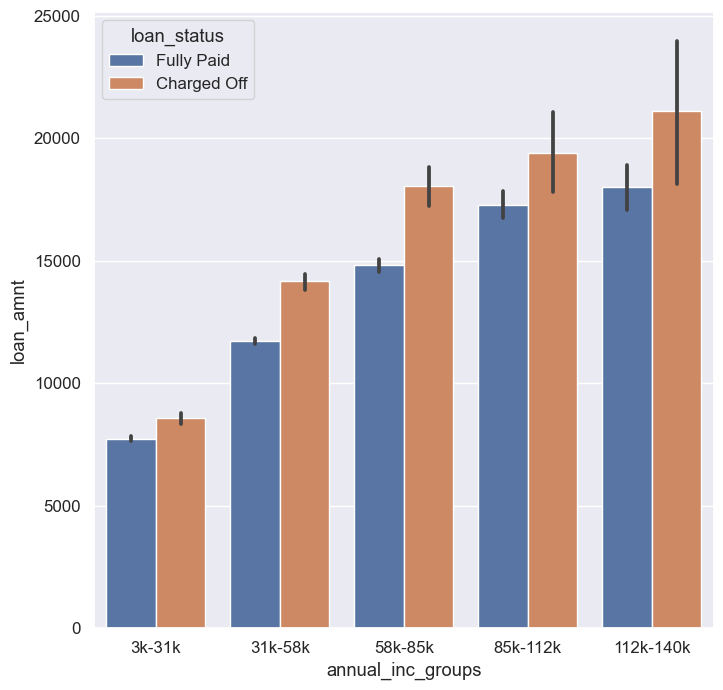

In [173]:
#Annual Income vs Loan amount
plt.figure(figsize=(8,8))
sns.barplot(data =loandata,x='annual_inc_groups', y='loan_amnt', hue ='loan_status',palette="deep")
plt.show()

#Across all the income groups, the defaulters are those who took higher loan amount

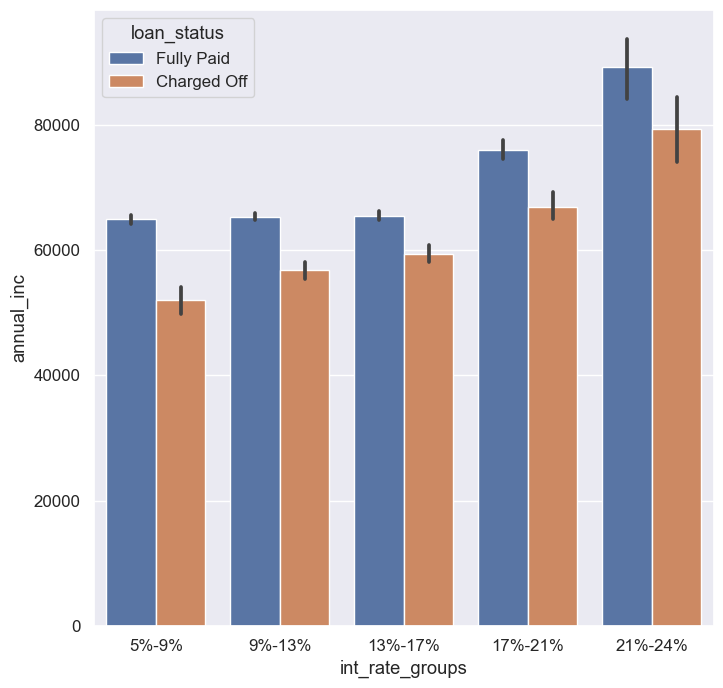

In [175]:
# Annual Income interest rate
plt.figure(figsize=(8,8))
sns.barplot(data =loandata,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="deep")
plt.show()

#across all the interest rate the charge off is higher for lowe annual inc 
#and is most charge off is seen in interest rate of 21-24%